In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import nltk
#nltk.download('punkt')

In [3]:
path = "/Users/torreshong/Documents/GitHub/DS105_Project/6622_jobs.xls"

df_import = pd.read_excel(path)
df_import.shape

(6623, 11)

In [4]:
df_import

,Unnamed: 0,title,details,deadline,opport_type,commence_date,contract_type,location,Renumeration,company,links
0,0,Rothschild & Co - Private Equity Long-Term Int...,This London-based 6-month internship is an exc...,2023-04-30,Internship,2023-07-01 00:00:00,Temporary,London,NaN,Rothschild & Co,https://careers.lse.ac.uk//students/jobs/detai...
1,1,2023 HSBC Global Graduate Programme (Hong Kong...,You’re excited about starting your career and ...,2023-01-06,Graduate employment,2023-07-03 00:00:00,Temporary,Hong KongSingapore,NaN,HSBC (HSBC) - Hong Kong,https://careers.lse.ac.uk//students/jobs/detai...
2,2,2023 HSBC Global Internship Programme (Hong Ko...,You’re excited about starting your career and ...,2023-01-06,Internship,2023-06-05 00:00:00,Temporary,Hong KongSingapore,NaN,HSBC (HSBC) - Hong Kong,https://careers.lse.ac.uk//students/jobs/detai...
3,3,"Graduate Training Scheme, Capital Markets",Graduate Training Scheme – LondonGreySpark Par...,2022-12-17,Graduate employment,9th Jan 2023,Permanent,London,NaN,GreySpark Partners Ltd,https://careers.lse.ac.uk//students/jobs/detai...
4,4,6-Months Internship – Sell-side Tech M&A,"At IPTP, we understand software from decades o...",2022-12-31,Internship,01/01/2023,Temporary,France,NaN,Inflexion Points Technology Partners (IPTP),https://careers.lse.ac.uk//students/jobs/detai...
...,...,...,...,...,...,...,...,...,...,...,...
6618,6618,2012 Summer Internship - Financial Software De...,Business: Financial Systems Area: Capital Mark...,2012-05-31,All types of work,NaN,NaN,,Salary competitive,FIS Global (FIS),https://careers.lse.ac.uk//students/jobs/detai...
6619,6619,Technical Consultant - Graduate Programme 2012,TECHNICAL CONSULTANTBusiness: Financial System...,2012-05-31,All types of work,Graduate Induction Week: 3rd of September 2012,NaN,,Salary competitive,FIS Global (FIS),https://careers.lse.ac.uk//students/jobs/detai...
6620,6620,Risk Implementation Consultant - Graduate Prog...,RISK IMPLEMENTATION CONSULTANTBusiness: Financ...,2012-05-31,All types of work,Graduate Induction Week: 3rd of September 2012,NaN,,Salary competitive,FIS Global (FIS),https://careers.lse.ac.uk//students/jobs/detai...
6621,6621,Project Consultant - Graduate Programme 2012,PROJECT CONSULTANTBusiness: Financial Systems ...,2012-05-31,All types of work,Graduate Induction Week:3rd of September 2012,NaN,,Salary competitive,FIS Global (FIS),https://careers.lse.ac.uk//students/jobs/detai...


In [5]:
df_deadline = df_import.iloc[3]

In [6]:
print (df_deadline)

Unnamed: 0                                                       3
title                   Graduate Training Scheme, Capital Markets 
details          Graduate Training Scheme – LondonGreySpark Par...
deadline                                       2022-12-17 00:00:00
opport_type                                    Graduate employment
commence_date                                         9th Jan 2023
contract_type                                            Permanent
location                                                    London
Renumeration                                                   NaN
company                                     GreySpark Partners Ltd
links            https://careers.lse.ac.uk//students/jobs/detai...
Name: 3, dtype: object


In [7]:

df_dnc =  df_import.iloc[:, [3,5]] #select deadline and commencement date
df_deadlines = df_import.iloc[:, [3]] #deadline
df_commence = df_import.iloc[:, [5]] #commencement date

df_dnc.head() 


,deadline,commence_date
0,2023-04-30,2023-07-01 00:00:00
1,2023-01-06,2023-07-03 00:00:00
2,2023-01-06,2023-06-05 00:00:00
3,2022-12-17,9th Jan 2023
4,2022-12-31,01/01/2023


In [8]:
df_deadlines

,deadline
0,2023-04-30
1,2023-01-06
2,2023-01-06
3,2022-12-17
4,2022-12-31
...,...
6618,2012-05-31
6619,2012-05-31
6620,2012-05-31
6621,2012-05-31


In [9]:

#
df_deadlines = df_deadlines.copy() #creating a copy to avoid the error that said I can't manipulate the orignial copy
df_deadlines['deadline'] = pd.to_datetime(df_deadlines['deadline']) #standardize the datetime format
n_deadlines = df_deadlines.groupby(df_deadlines['deadline'].dt.floor('d')).size().reset_index(name='counts') #counting occurances of each date

#grouping the deadlines by year
df_deadlines_by_year = df_deadlines.groupby(df_deadlines['deadline'].dt.year).size().reset_index(name='counts')
df_deadlines_by_year_dict = {year: group for year, group in df_deadlines.groupby(df_deadlines['deadline'].dt.year)}


n_deadlines


,deadline,counts
0,2012-01-30,1
1,2012-01-31,1
2,2012-02-17,1
3,2012-02-22,1
4,2012-02-29,3
...,...,...
2223,2023-02-18,2
2224,2023-02-28,1
2225,2023-03-04,2
2226,2023-03-31,1


In [10]:
n_deadlines[:1]


,deadline,counts
0,2012-01-30,1


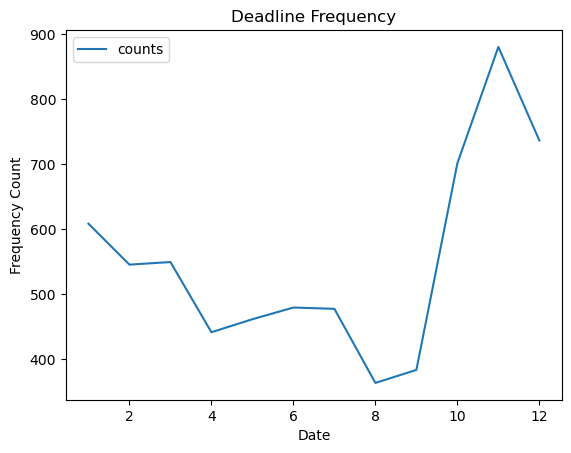

In [35]:
import matplotlib.dates as mdates

deadline_plot = n_deadlines.plot(x='deadline', y='counts', kind='line')
deadline_plot.set_title('Deadline Frequency')
deadline_plot.set_xlabel('Date')
deadline_plot.set_ylabel('Frequency Count')


plt.show()




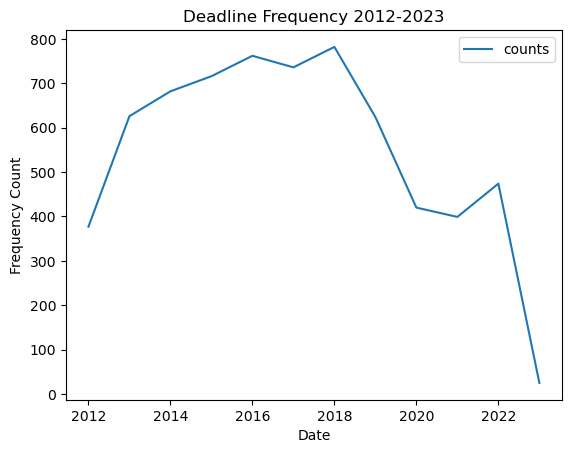

In [31]:
deadline_plot = df_deadlines_by_year.plot(x='deadline', y='counts', kind='line')
deadline_plot.set_title('Deadline Frequency 2012-2023')
deadline_plot.set_xlabel('Date')
deadline_plot.set_ylabel('Frequency Count')


plt.show()


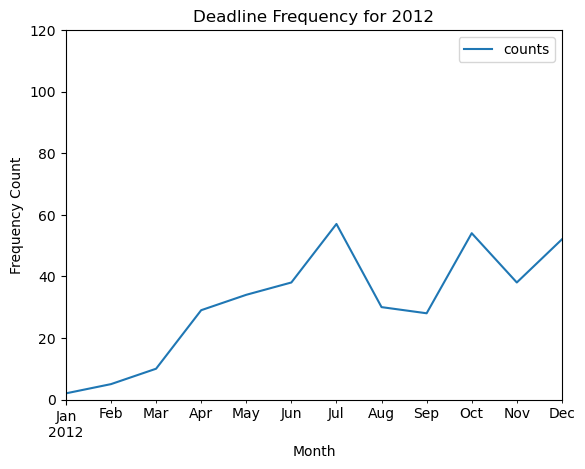

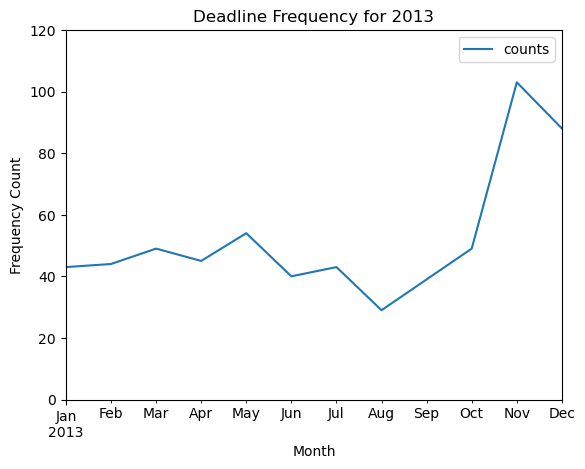

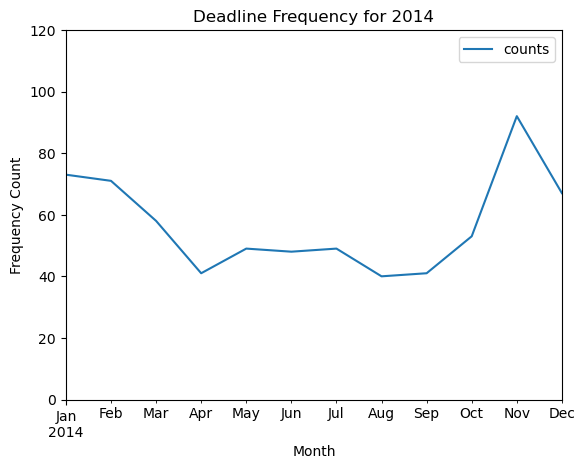

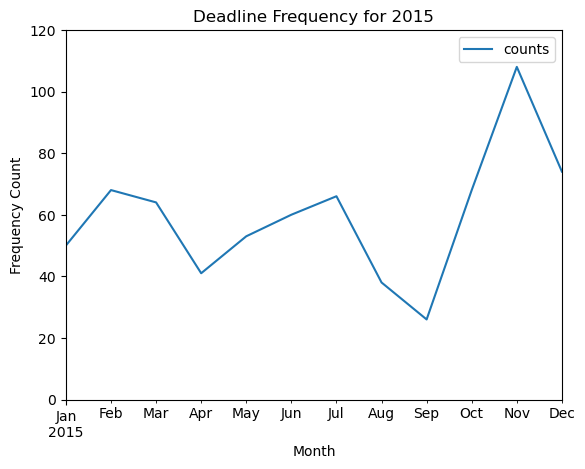

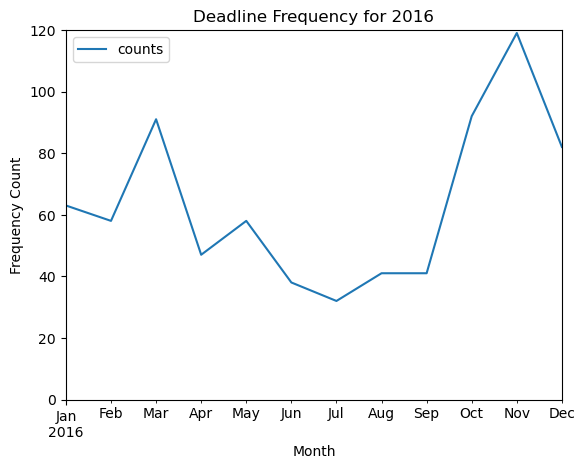

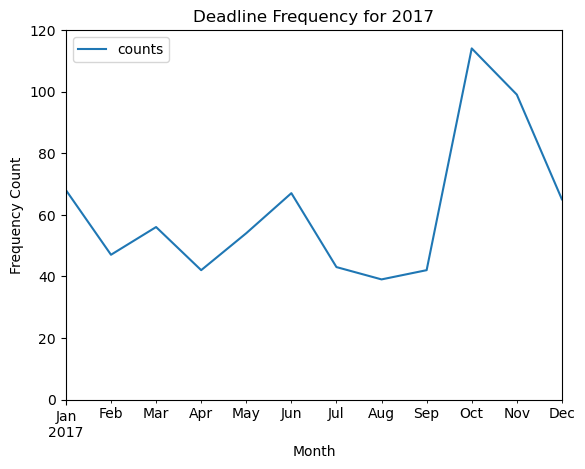

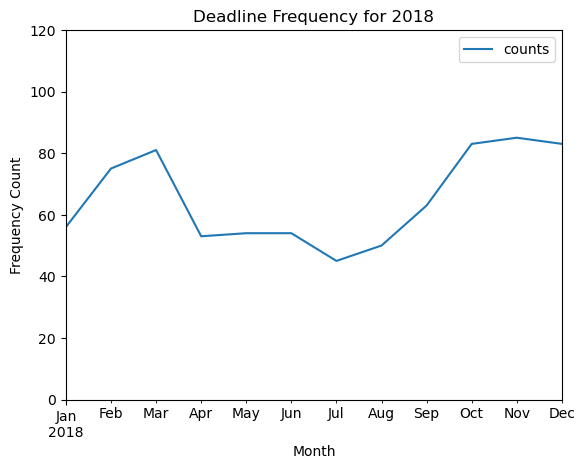

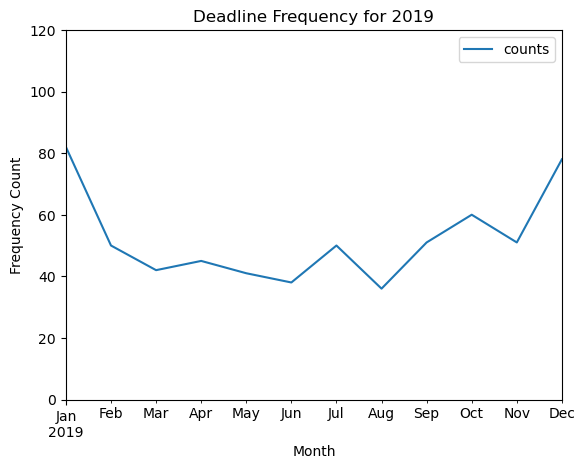

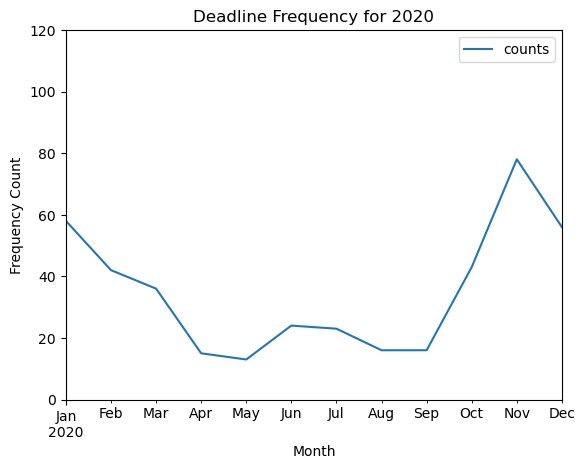

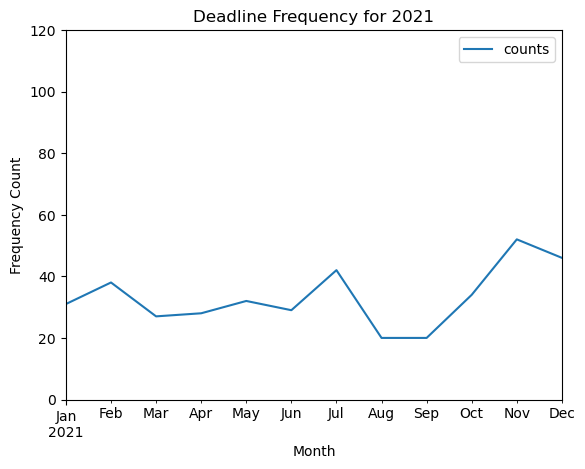

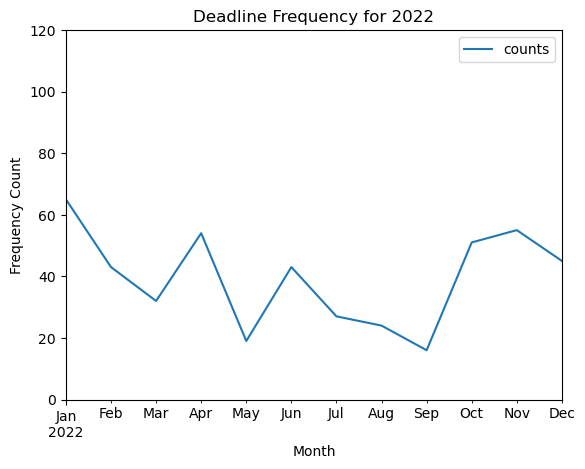

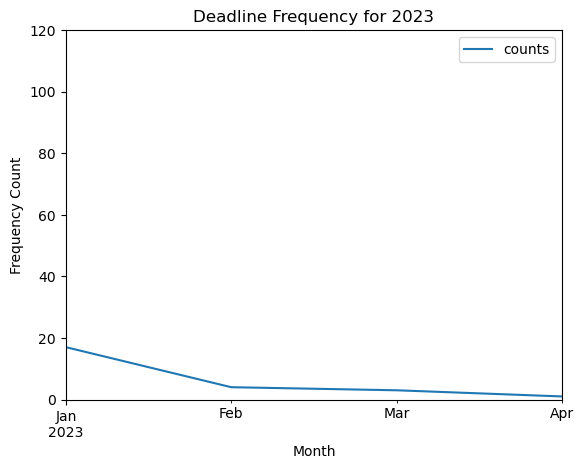

In [36]:
for year, group in df_deadlines_by_year_dict.items():
    group = group.groupby(group['deadline'].dt.to_period('M')).size().reset_index(name='counts')
    group = group.set_index('deadline')
    group_plot = group.plot(y='counts', kind='line')
    group_plot.set_title(f'Deadline Frequency for {year}')
    group_plot.set_xlabel('Month')
    group_plot.set_ylabel('Frequency Count')
    group_plot.set_ylim(0,120) #standardizing y axis
    plt.show()




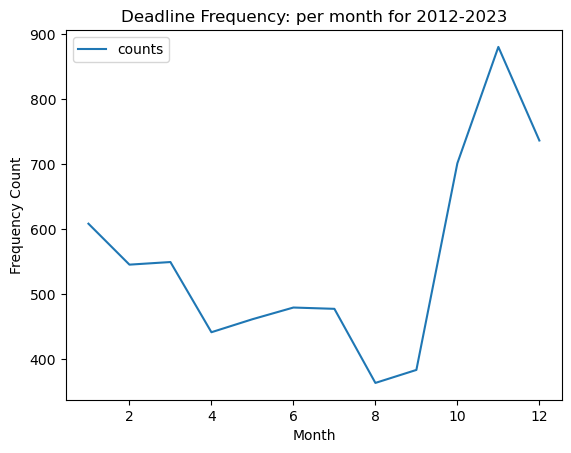

In [14]:
df_deadlines = df_deadlines.copy() #creating to avoid the error
df_deadlines['deadline'] = pd.to_datetime(df_deadlines['deadline'])
n_deadlines = df_deadlines.groupby(df_deadlines['deadline'].dt.month).size().reset_index(name='counts')

deadline_plot = n_deadlines.plot(x='deadline', y='counts', kind='line')
deadline_plot.set_title('Deadline Frequency: per month for 2012-2023')
deadline_plot.set_xlabel('Month')




deadline_plot.set_ylabel('Frequency Count')
plt.show()


In [15]:
#plt.show(deadline_series)


In [16]:
#type(n_deadlines)

In [17]:
#if 'deadline' in globals():
#    print("deadlines is defined.")
#else:
#    print("deadlines is not defined.")


In [18]:
#import matplotlib.pyplot as plt
#import matplotlib.dates as mdates

#n_deadlines = pd.DataFrame(n_deadlines[:1], columns=['deadline'])
#n_deadlines['counts'] = 1
#n_deadlines.index = pd.to_datetime(n_deadlines['deadline'], unit='s')
#n_deadlines.drop('deadline', axis=1, inplace=True)
#n_deadlines_by_month = n_deadlines.resample('M').sum()

#deadline_plot = n_deadlines_by_month.plot(y='counts', kind='line')
#deadline_plot.set_title('Deadline Frequency (by Month)')
#deadline_plot.set_xlabel('Date')
#deadline_plot.set_ylabel('Frequency Count')
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#plt.gcf().autofmt_xdate()
#plt.show()




In [19]:
#import matplotlib.pyplot as plt
#import pandas as pd

# Group data by year
#n_deadlines_by_year = n_deadlines.groupby(n_deadlines['deadline'].dt.year).sum()

# Plot each group separately
#for year, group in n_deadlines_by_year.groupby(level=0):
#    group.plot(x='deadline', y='counts', kind='line')
 #   plt.title(f'Deadline Frequency ({year})')
  #  plt.xlabel('Date')
  #  plt.ylabel('Frequency Count')
   # plt.show()


In [20]:
#import matplotlib.pyplot as plt
#mport matplotlib.dates as mdates
#import pandas as pd
#
## Group data by year
#n_deadlines_by_year = n_deadlines.groupby(n_deadlines['deadline'].dt.year).sum().reset_index() #reset the index of n_deadlines_by_year to have the proper label



#n_deadlines_by_year



In [21]:
# Plot data with x-axis labeled by year
#deadline_plot = n_deadlines_by_year.plot(x='deadline', y='counts', kind='line', x_compat=True)
#plt.gca().xaxis.set_major_locator(mdates.YearLocator())
#plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() #for the dividers on the x axis
#plt.title('Deadline Frequency')
#plt.xlabel('Date')
#plt.xticks(rotation=80)
#plt.ylabel('Frequency Count')
#plt.show()


In [22]:
# Plot each year separately with x-axis labeled by month
#for year, group in n_deadlines.groupby(n_deadlines['deadline'].dt.year):
 #   group_by_month = group.groupby(group['deadline'].dt.month).sum()
  #  group_by_month.plot(x='deadline', y='counts', kind='line')
   # plt.title(f'Deadline Frequency ({year})')
#    plt.xlabel('Date')
 ##  plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
   # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    #plt.show()

In [23]:
#df_deadline
#print(df_deadline.dtypes)

In [24]:
#import pandas as pd

#df_deadline['deadline'] = pd.to_datetime(df['deadline'], infer_datetime_format=True) #Converting the deadline column to datetime format with the `infer_datetime_format` argument set to True
#df_deadline.set_index('deadline', inplace=True) # Set the deadline column as the index of the dataframe

#df_deadline = df_deadline.copy()
#df_deadline['deadline'] = pd.to_datetime(df['deadline'], infer_datetime_format=True)
#df_deadline.set_index('deadline', inplace=True)

#print(df_deadline)



In [25]:

#try:
 #   df_deadline.loc[:, 'deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d')
#except ValueError:
 #   df_deadline.loc[:, 'deadline'] = pd.to_datetime(df['deadline'], format='%m/%d/%Y')

#print(df_deadline)

In [26]:
#from datetime import datetime

#standard_format = '%Y-%m-%d'

#s_deadlines = [] #standardize deadlines to datetime format
#for date_string in df_deadline:
 #   try:
  #      date = datetime. strptime(date_string, '%Y-%m-%d')
   #     s_deadline = date.strftime(standard_format)
    #except ValueError:
     #   s_deadline = None
      #  s_deadlines.append(s_deadline) #wrap the strptime method in a try-except block and handle exceptions if needed

#len(s_deadlines)

In [27]:
# len(s_deadlines)

In [28]:
#df.to_csv('df_dnc') #convert df to csv
#dnc_series = pd.read_csv('df_dnc')
#dnc_series['deadline'] = pd.to_datetime(dnc_series['deadline']) #convert into datetime data type

In [29]:
#print(dnc_series.head(5))